<a href="https://colab.research.google.com/github/AdityaGitHubPro/CodeClause-Fake_News_Detection/blob/main/FAKE_NEWS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FAKE NEWS PREDICTION**

In [31]:
import numpy as np
import pandas as pd

## **Importing the dataset**

In [32]:
df=pd.read_csv('/content/drive/MyDrive/Data Set Of Machine Learning/news.csv')

### **First Rows of DataSet**

In [33]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### **Last Rows of DataSet**

In [34]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


### **Shape of The DataSet**

In [35]:
df.shape

(6335, 4)

### **To check for Duplicates Values**

In [36]:
df.duplicated().sum()

0

### **Removing The Duplicates**

In [37]:
df=df.drop_duplicates()

In [38]:
df.duplicated().sum()

0

### **Is there any null values is the DataSet**

In [39]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

### **Removing the Unnamed Colums**

In [40]:
df=df.drop('Unnamed: 0', axis=1)

In [41]:
df.sample(20)

,title,text,label
4967,More Bang for the Buck | New Eastern Outlook,Region: Russia in the World More bang for the ...,FAKE
5462,6 detained in raids in Belgium,"Brussels, Belgium (CNN) Police detained six pe...",REAL
2474,Obama Says Terrorists Seek Legitimacy by Using...,President Barack Obama said the U.S. and its a...,REAL
4024,"Obama Administration Mandate Ordering ""Sex Cha...",Email \nIt has become increasingly apparent th...,FAKE
5603,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
6090,"“If Trump Loses, I’m Grabbing My Musket”: Form...",324 324 likes \nHis heated rhetoric is a respo...,FAKE
2597,Study: Running linked to extended lifespan and...,Study: Running linked to extended lifespan and...,FAKE
5749,"GOP Presidential Hopefuls Serve Up Ice Cream, ...","GOP Presidential Hopefuls Serve Up Ice Cream, ...",REAL
1404,"Guy Fawkes, The Gun Powder Plot & How False Fl...","We Are Change \n\n \nRemember, remember, the 5...",FAKE
6027,Surprise! Donald Trump is wrong about immigran...,Donald Trump's two-week-old campaign has been ...,REAL


### **Checking how many outputes do we have**

In [42]:
l=df.label;
l.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### **Statistical Description**

In [43]:
df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


### **Deleting the Title colums as we want to work on title column**

In [44]:
df=df.drop('title',axis=1)

In [45]:
df.sample(20)

,text,label
2131,10/27/2016 TRUTH REVOLT http://youtu.be/PsVNKm...,FAKE
2862,Back Story Of FBI’s Hillary Cover-Up FBI corru...,FAKE
2142,With early voting opening as early as next wee...,REAL
4296,Government forces appeared close to capturing ...,REAL
5135,0 comments \nPerhaps no country has been more ...,FAKE
1659,Obama To Limit Police Acquisition Of Some Mili...,REAL
5206,Presidential candidate Marco Rubio Saturday wa...,REAL
6306,Sound too “strange” to be true? We have proof!...,FAKE
4830,"By Sarah Jones on Sun, Oct 30th, 2016 at 8:59 ...",FAKE
111,(CNN) Several bombers are dead. At least one a...,REAL


# **Data Visualization**

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Pie Diagram**

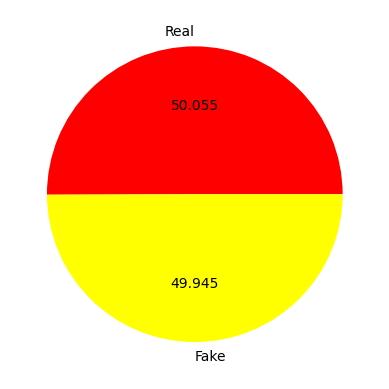

In [47]:
plt.pie(df['label'].value_counts(),labels=['Real','Fake'],colors=['red','yellow'],autopct='%0.3f')
plt.show()

# **Data is well distrubuted**

### **Function to change the texts (title, text) Machine Understandable**

In [48]:
import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [49]:
import string

df["text"] = df["text"].apply(convert)

In [50]:
df

,text,label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,— kaydee king kaydeeking november 9 2016 the l...,FAKE
4,its primary day in new york and frontrunners h...,REAL
...,...,...
6330,the state department told the republican natio...,REAL
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE
6332,antitrump protesters are tools of the oligarc...,FAKE
6333,addis ababa ethiopia —president obama convened...,REAL


# **Making Data Ready for Model fitting**

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.sample(10)

,text,label
3658,one thing that is certain about monday’s rulin...,1
2713,as numerous surveys have revealed fox news may...,1
5909,share on twitter the republican national commi...,0
4482,louisiana election officials seize voting mach...,0
5300,cnn donald trump and hillary clinton came home...,1
4209,real estate mogul donald trump said during hi...,1
1741,each week in theory takes on a big idea in the...,1
5834,email hillary clinton personally ordered a con...,0
130,two days after supreme court justice antonin s...,1
4864,posted by eddie if you’ve been keeping up with...,0


# **1 Means Fake and 0 Means Real**

In [52]:
x=df['text']
y=df['label']

### **Splitting into Training and Testing DataSet**

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'], test_size=0.2, random_state=7)

In [54]:
x_train

6237    the head of a leading survivalist group has ma...
3722    ‹ › arnaldo rodgers is a trained and educated ...
5774    patty sanchez 51 used to eat 13000 calories a ...
336     but benjamin netanyahu’s reelection was regard...
3622    john kasich was killing it with these iowa vot...
                              ...                        
5699                                                     
2550    it’s not that americans won’t elect wealthy pr...
537     anyone writing sentences like ‘nevertheless fu...
1220    more catholics are in congress than ever befor...
4271    it was hosted by cnn and the presentation was ...
Name: text, Length: 5068, dtype: object

### **To Convert Text Data to Vectors**

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train= vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

### **Using Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.9187056037884768

# **TESTING**

In [66]:
def answer(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def test(n):
    test_n = {"text":[n]}
    new_def_test = pd.DataFrame(test_n)
    new_def_test["text"] = new_def_test["text"].apply(convert) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("Prediction: {} ".format(answer(pred_LR[0])))

# **Predictions**

In [67]:
n="Presidential hopefuls in both parties agree on at least one thing: Economic mobility, and the feeling of many Americans that they are being shut out from the nationâ€™s prosperity, will be a defining theme of the 2016 campaign."
test(n)

Prediction: Fake News 


In [68]:
n="With Trump's call for a temporary ban on Muslims entering the United States, several of the nation's most esteemed journalists and influential news outlets have set aside traditional notions of balance and given themselves license to label the Republican front-runner a liar, a demagogue, a racist and worse."
test(n)

Prediction: Fake News 


In [69]:
n="While some Justice Department investigations are adversarial, a new model of collaborative reform is surprising police in some cities, asÂ they find themselves included as part of the solution. Searching for a framework ... [to] heal, Baltimore Mayor Stephanie Rawlings-Blake put in a 911 call to the US Department of Justice to ask for a civil rights investigation into the Baltimore Police Departmentâ€™s beat cop tactics. Her call, not even a week after a local prosecutor charged six police officers with crimes including murder for their alleged role in the death of Freddie Gray, is part of a broader trend of collaborative reform between Washington and local jurisdictions. What's striking about such investigations is that they don't just slam the police, but also aim to help officers stay safe and protect citizens, as well as show that they are part of the solution. In fact, following a Baltimore Sun series on police abuses in the city last year, Police Commissioner Anthony Batts approached the Justice Department to conduct a collaborative review, which had been under way the day Mr. Gray died while in police custody. Some DOJ investigations are adversarial, as police bristle at court orders and federal monitors. But a federal investigation into whether Baltimore cops routinely violate peopleâ€™s civil rights is likely to mirror similar probes in Las Vegas and Philadelphia, where police chiefs have been able to use federal findings to gain leverage with elected officials and also use facts to rebut claims by police officers that theyâ€™re doing nothing wrong, says Sam Walker, a criminologist at the University of Nebraska at Omaha. To be sure, Mr. Walker says, itâ€™s â€œtoo early to tellâ€ whether such interventions can bring the kind of fundamental reforms that Mayor Rawlings-Blake is hoping to find in the aftermath of Grayâ€™s death and injuries to nearly 100 cops during violent riots. But there is growing evidence that such collaborative efforts can help communities grapple with deep tensions between police and neighborhoods and build trust around common goals like respect, dignity, and sanctity of life. After Las Vegas police shot a record 25 people in 2010, the city began its own reforms and asked the Department of Justice for help a year later. In 2011, the DOJ began the new collaboration program, delving deep into practices, training procedures, and policies to root out where officers were going wrong and where policies failed the people. As of 2012, the Las Vegas department had completed dozens of difficult reforms, including rewriting its use-of-deadly-force policy to include a reference to officers acknowledging the â€œsanctity of human lifeâ€ as they make critical split-second decisions. The department added so-called reality-based training to give officers more options than quick deployment of deadly force as they interacted with drugged, drunk, or mentally ill citizens. Since then, the number of officer-involved shootings in Las Vegas has stayed below historical averages, year to year. In March, the Justice Department reported back on practices of the Philadelphia Police Department, which had seen a stretch of years in which police killed a person nearly every week, many of them unarmed. The DOJ team, which was made up of policing experts and not prosecutors, released a string of findings that pointed to problems in both policy and training. Surprisingly to some, many complaints came from officers themselves. Among the findings were complaints from officers that they were not properly trained to deal with violent suspects. The training needed to be less staged and more reality-based, officers said, including allowing trainees to grapple with each other to learn tactics. â€œInterview participants generally thought that the defensive tactics training offered at the academy focused too much on legal liability and not enough on teaching practical and realistic methods for surviving a physical encounter,â€ the DOJ report stated. â€œThey did not believe that [training] sufficiently prepared them for a physical encounter.â€ Aside from giving leaders hard facts to work with, such reports can also help defend police officers. Even though many police shootings have a racial backdrop, the Justice Department found that Philadelphia police did not have a problem with racial stereotyping. In fact, unarmed white males were more likely to be shot and killed by Philadelphia police than unarmed black males. â€œI want to express regrets for all who have been shot in Philadelphia, civilians or police officers.... Every life is precious in this city and this country, so we need to maintain this level of focus,Philadelphia Mayor Michael Nutter said in March. We're one big city. Everyone wants to be safe. Citizens want to be safe. Police officers want to be safe. The Justice Department has conducted 19 civil rights investigations since 2000, stepping up the efforts in the Obama era, with five police departments coming under federal monitoring in 2012 alone. Some of those investigations have been scathing, including a report in March that documented abuses by the Ferguson (Mo.) Police Department that helped fuel protests in the wake of Michaelâ€™s Brown death last August, at the hands of a police officer. So far, Attorney General Loretta Lynch has not replied to the Baltimore mayorâ€™s request for a separate civil rights abuse probe. But the request makes clear that the cityâ€™s police probably have problems that go beyond the treatment of Gray. Since 2011, the city has settled more than 100 lawsuits equaling nearly $6 million in cases where people were bruised and battered by officers, only to have trumped-up charges later dropped by a judge. True, institutional change can be difficult. After the Baltimore Police Department promised the courts in 2010 it would curb the large percentage of false arrests in the city by offering better training, the department dragged its feet, the American Civil Liberties Union has alleged. The issue has reared up again in the Gray case, since prosecutor Marilyn Mosby has charged that officers falsely arrested Gray for carrying a legal knife. But so far in Philadelphia and Las Vegas, one key to success has been the efforts to engage police officers in the process by showing them that they are part of the solution, and that the collaboration isn't about outsiders second-guessing their actions. In Philadelphia, Commissioner Charles Ramsey sent every officer a link to the Las Vegas report, so they could see for themselves that it was more an attempt to help officers stay safe and protect citizens than blaming them for their actions. Cops are always leery of something, Mr. Ramsey told the Baltimore Sun. We did as much as we could to alleviate any concerns and fears."
test(n)

Prediction: Real News 


In [70]:
n="Just weeks ago, it did not seem that Marco Rubio needed to lose any sleep over Jeb Bush. After all, Rubio was seen as the darling presidential candidate of the GOP establishment because of a string of impressive debate performances and a strong Iowa caucus showing. But after a disastrous GOP debate where Chris Christie essentially left the normally cool and eloquent Rubio stammering, followed by a fifth-place finish in the New Hampshire primary, the South Carolina vote on Saturday has become critical for the Florida lawmaker. He must persuade people who had been ready to ditch Bush for Rubio after New Hampshire, but who got jittery after he did worse than expected, that he has recovered and is the best non-extreme Republican option for the nomination, according to the New York Times. A Rubio supporter said the senator entered the ill-fated debate with indications from Bush backers that they would be ready to switch loyalty after the New Hampshire primary, which had been expected to seal Rubio as the best bet for the GOP establishment. But after Christie successfully repeatedly attacked Rubio in the debate, the supporter told the Times, â€œthose calls stopped.â€ Another unidentified supporter added: â€œTotally frozen.â€ Friends, advisers and backers of Rubio says if he should finish behind Bush, it would spell real trouble for the junior senator, according to the Times. To be sure, thus far South Carolina voter polls indicate that Donald Trump will win, perhaps with a double-digit margin over whoever comes in second place. Rubioâ€™s campaign has taken the blame for the fallout after the debate that hurt their candidate, saying they had made a tactical error in advising him not to hit back hard at Christie because it wouldnâ€™t pay off. A weaker-than-expected showing by Sen. Ted Cruz, who is pursuing conservative and evangelical voters, is seen as a potential boost to Rubio, a one-time Tea Party favorite who could pick up anti-Trump conservatives, many experts say. Basically, many believe Rubio cannot come in lower than third, certainly not behind Bush, who doggedly has been trying to wear the establishment mantle and at the start of the election cycle seemed like the inevitable moderate GOP front-runner. All told, the stakes are high in South Carolina, where about a third of voters remain undecided. â€œWhen you see what happens in South Carolina,â€ Tim Scott, a Republican senator in South Carolina told the Times, â€œit will carry momentum into Nevada, and then into Super Tuesday.â€ Like us on Facebook"
test(n)

Prediction: Real News 
